In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Merge Data

In [7]:
files = [file for file in os.listdir("./sales_data")]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./sales_data/"+file)
    all_data = pd.concat([all_data, df])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Up Data

In [8]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
# display(nan_df.head())

all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Add & Change Data Type

In [9]:
# Clean up some data
all_data = all_data[all_data["Order Date"].str[0:5]!="Order"]

# Add month column
all_data["Month"] = all_data["Order Date"].str[0:2]

# Add hour and minutes column
all_data["Hour"] = pd.to_datetime(all_data["Order Date"]).dt.hour
all_data["Minute"] = pd.to_datetime(all_data["Order Date"]).dt.minute

# Convert column to number
all_data["Month"] = pd.to_numeric(all_data["Month"])
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

# Add city data from Purchase Address
def get_city(address):
    return address.split(",")[1].strip(" ")
def get_state(address):
    return address.split(",")[2].split(" ")[1]
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

# Add Sales data
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

# Export Data to csv
all_data.to_csv("./sales_data/sales_data_2019.csv", index=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2607582278.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Hour"] = pd.to_datetime(all_data["Order Date"]).dt.hour
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\2607582278.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Minute"] = pd.to_datetime(all_data["Order Date"]).dt.minute


### Read Cleaned Data

In [10]:
all_data = pd.read_csv("./sales_data/sales_data_2019.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,8,46,Dallas (TX),23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,22,30,Boston (MA),99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Los Angeles (CA),600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Los Angeles (CA),11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,9,27,Los Angeles (CA),11.99


### Q1: What was the best month for Sales?

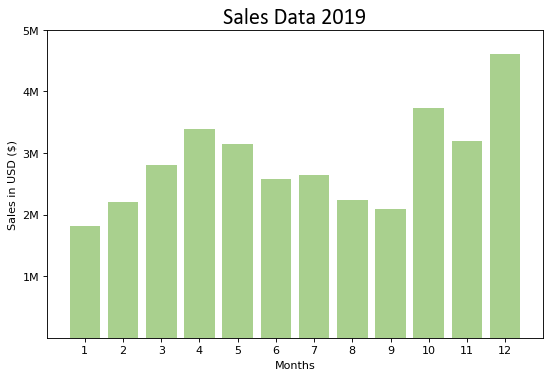

In [11]:
result = all_data[["Month", "Quantity Ordered", "Sales"]].groupby(["Month"]).sum()
# all_data.groupby(["Month"]).sum().sort_values(["Sales"], ascending=False)

months = range(1,13)
sales = [i*1000000 for i in range(1,6)]
annot = [str(j) + "M" for j in range(1,6)]

plt.figure(figsize=(8,5), dpi=80)

plt.title("Sales Data 2019", fontdict={"fontname":"Calibri", "fontsize":20})

colors = ["#F4B084", "#A9D08E", "#9BC2E6", "#FFD966"]

plt.bar(months, result["Sales"], color=colors[1])

plt.xlabel("Months")
plt.ylabel("Sales in USD ($)")

plt.xticks(months)
plt.yticks(sales, annot)

plt.show()

### Q2: What city has the highest Sales

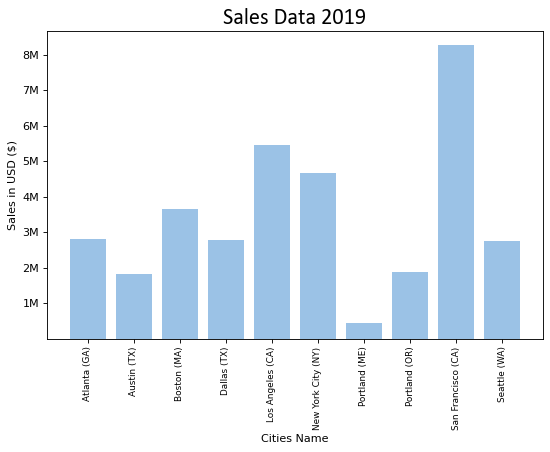

In [12]:
result = all_data[["City", "Quantity Ordered", "Sales"]].groupby(["City"]).sum()

cities = [city for city, df in all_data.groupby("City")]
sales = [i*1000000 for i in range(1,9)]
annot = [str(j) + "M" for j in range(1,9)]

plt.figure(figsize=(8,5), dpi=80)

plt.title("Sales Data 2019", fontdict={"fontname":"Calibri", "fontsize":20})

colors = ["#F4B084", "#A9D08E", "#9BC2E6", "#FFD966"]

plt.bar(cities, result["Sales"], color=colors[2])

plt.xlabel("Cities Name")
plt.ylabel("Sales in USD ($)")

plt.xticks(cities, rotation="vertical", size=8)
plt.yticks(sales, annot)

plt.show()

### Q3: What time should we display advertisements?

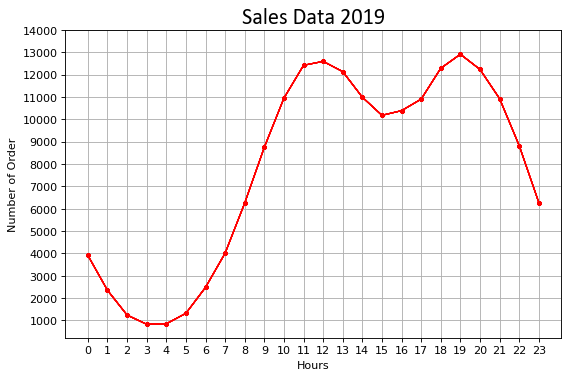

In [13]:
result = all_data.groupby(["Hour"]).count()

hours = [hour for hour, df in all_data.groupby("Hour")]
order = [i*1000 for i in range(1,15)]

plt.figure(figsize=(8,5), dpi=80)

plt.title("Sales Data 2019", fontdict={"fontname":"Calibri", "fontsize":20})

colors = ["#F4B084", "#A9D08E", "#9BC2E6", "#FFD966"]

plt.plot(hours, result, color="red", linewidth=1, marker=".", linestyle="-")

plt.xlabel("Hours")
plt.ylabel("Number of Order")

plt.xticks(hours)
plt.yticks(order)

plt.grid()
plt.show()

### Q4: What product sold the most?

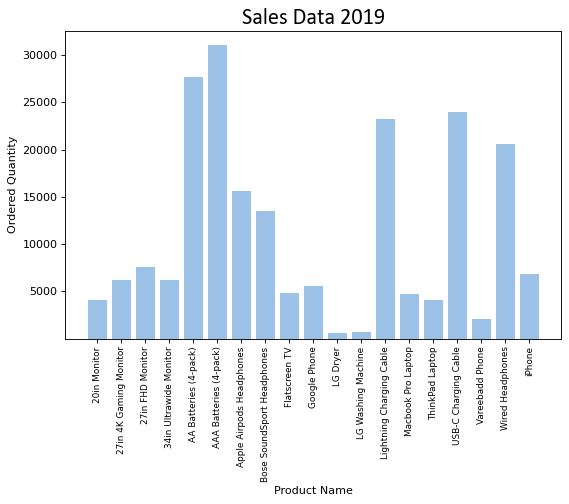

In [14]:
result = all_data[["Quantity Ordered", "Product", "Sales"]].groupby(["Product"]).sum()

products = [product for product, df in all_data.groupby("Product")]
quantity = [i*5000 for i in range(1,7)]

plt.figure(figsize=(8,5), dpi=80)

plt.title("Sales Data 2019", fontdict={"fontname":"Calibri", "fontsize":20})

colors = ["#F4B084", "#A9D08E", "#9BC2E6", "#FFD966"]

plt.bar(products, result["Quantity Ordered"], color=colors[2])

plt.xlabel("Product Name")
plt.ylabel("Ordered Quantity")

plt.xticks(products, rotation="vertical", size=8)
plt.yticks(quantity)

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18352\393664129.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation="vertical", size=8)


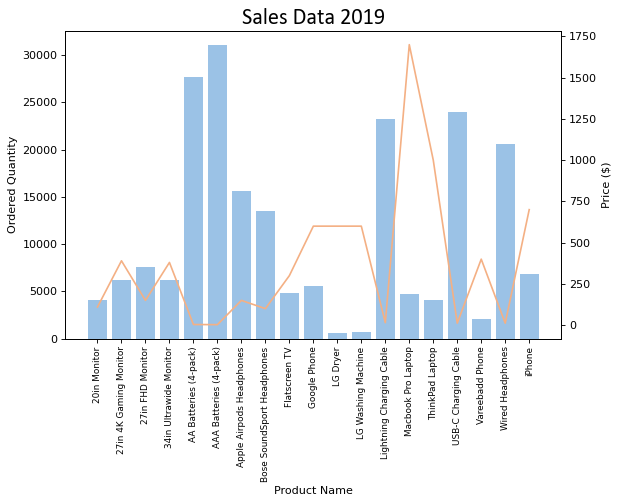

In [15]:
result_qty = all_data[["Quantity Ordered", "Product", "Sales"]].groupby(["Product"]).sum()
result_prc = all_data[["Price Each", "Product", "Quantity Ordered"]].groupby(["Product"]).mean()

products = [product for product, df in all_data.groupby("Product")]
quantity = [i*5000 for i in range(1,9)]

fig, ax1 = plt.subplots(figsize=(8,5), dpi=80)

ax2 = ax1.twinx()

ax1.set_title("Sales Data 2019", fontdict = {"fontname": "Calibri", "fontsize": 20})

colors = ["#F4B084", "#A9D08E", "#9BC2E6", "#FFD966"]

ax1.bar(products, result_qty["Quantity Ordered"], color=colors[2])
ax2.plot(products, result_prc["Price Each"], color=colors[0])

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Ordered Quantity")
ax2.set_ylabel("Price ($)")

ax1.set_xticklabels(products, rotation="vertical", size=8)

plt.show()